# Intro to adversarial attacks
Simple white box - full access adversarial attack on EfficietnNet B0 using the Cleverhans library.

## Imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
!pip install --quiet -U git+https://github.com/qubvel/efficientnet
!pip install --quiet -U git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans
import efficientnet.keras as efn
from cleverhans.future.tf2.attacks import fast_gradient_method, madry_et_al
decode_predictions = tf.keras.applications.efficientnet.decode_predictions

## Plot utils

In [5]:
def plot_image_prediction(image, base_model):
  decoded_pred = decode_predictions(base_model(image, training=False).numpy(), top=1)[0][0]
  mean = [0.485, 0.456, 0.406]
  std = [0.229, 0.224, 0.225]
  image = np.clip((image.numpy()*std)+mean,0,1) 
  plt.figure(figsize=(10,10))
  plt.imshow(image[0,:,:,:])
  plt.show()
  print(decoded_pred)

## FGSM 

In [6]:
IMG_SIZE = (224,224)
IMG_SHAPE = IMG_SIZE + (3,)
base_model = efn.EfficientNetB0(input_shape=IMG_SHAPE, weights='imagenet',include_top=True)
base_model.trainable = False

21831680/21826536 [==============================] - 0s 0us/step


40960/35363 [==================================] - 0s 0us/step


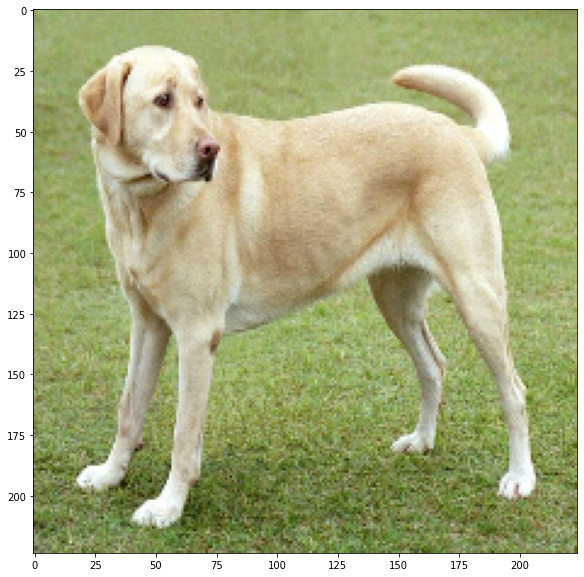

('n02099712', 'Labrador_retriever', 0.54429686)


In [7]:
image_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image_raw)
image = tf.image.resize(image, IMG_SIZE)
image = efn.preprocess_input(image)
image = tf.expand_dims(image, axis=0)
plot_image_prediction(image, base_model)

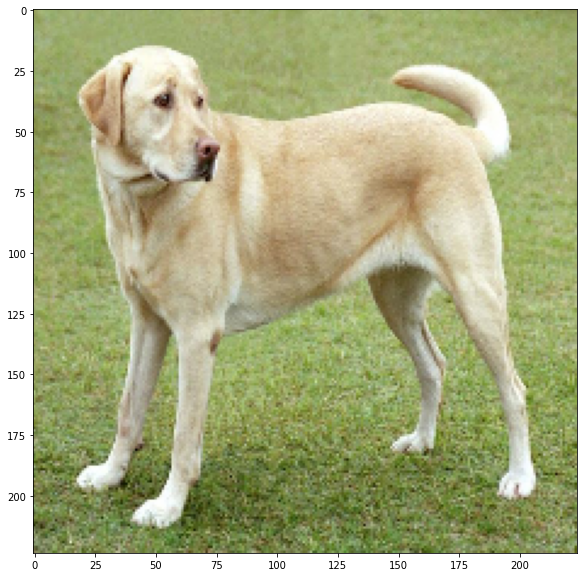

('n02091831', 'Saluki', 0.17355582)


In [8]:
attacked = fast_gradient_method(base_model, image, eps=2, norm=2)
plot_image_prediction(attacked, base_model)

## Targeted
All imagenet labels here https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

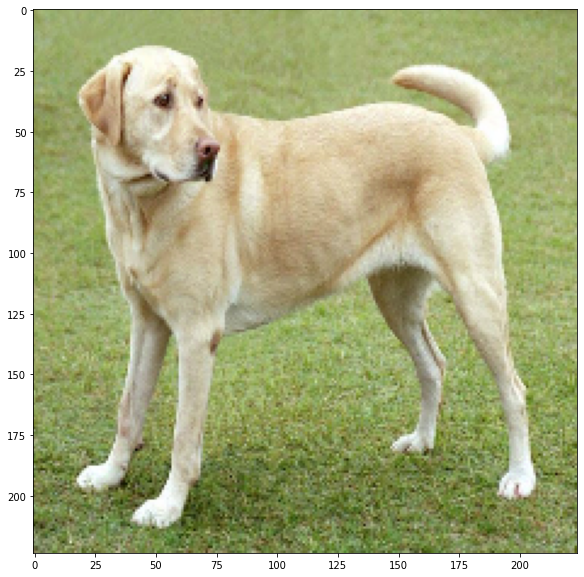

('n04254680', 'soccer_ball', 0.38334975)


In [ ]:
attacked = madry_et_al(base_model, image, eps=5, norm=2, nb_iter=10, eps_iter=5,
                                targeted=True, y=[805])
plot_image_prediction(attacked, base_model)

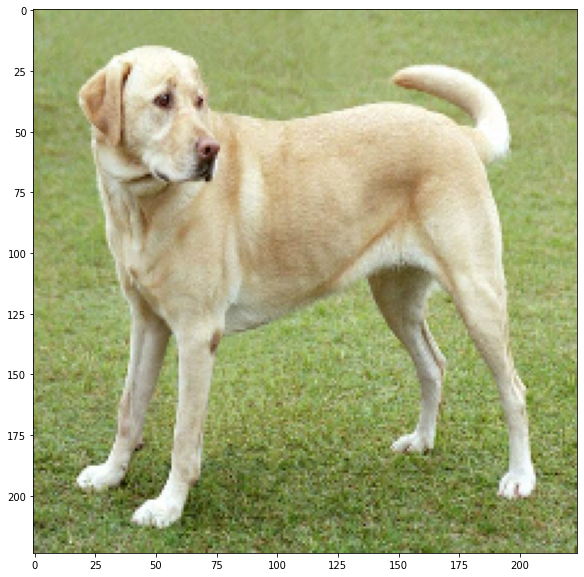

('n02108915', 'French_bulldog', 0.44801745)


In [ ]:
attacked = madry_et_al(base_model, image, eps=4, norm=2, nb_iter=10, eps_iter=4,
                                targeted=True, y=[245])
plot_image_prediction(attacked, base_model)